In [47]:
! pip install numpy pandas torch
! python -m pip install -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 64.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 73.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:004 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 55.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 70.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 79.5 MB/s eta 0:00:000m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 66.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 65.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [26]:

import numpy as np
import matplotlib.pyplot as plt
import random
import sys          # we use sys to get the max value of a float
import pandas as pd # we only use pandas for displaying tables nicely
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
# Globals:
ACTIONS = ("up", "down", "left", "right")

# Rewards, terminals and obstacles are characters:
REWARDS = {" ": -1, ".": 2, "+": 30, "-": -10}
OBSTACLES = ("#")

# Discount factor
gamma = 1

# The probability of a random move:
rand_move_probability = 0

class World:
  def __init__(self, width, height):
    self.width = width
    self.height = height
    # Create an empty world where the agent can move to all cells
    self.grid = np.full((width, height), '.', dtype='U1')

  def add_obstacle(self, start_x, start_y, end_x=None, end_y=None):
    """
    Create an obstacle in either a single cell or rectangle.
    """
    if end_x == None: end_x = start_x
    if end_y == None: end_y = start_y

    self.grid[start_x:end_x + 1, start_y:end_y + 1] = OBSTACLES[0]

  def add_reward(self, x, y, reward):
    assert reward in REWARDS, f"{reward} not in {REWARDS}"
    self.grid[x, y] = reward

  def is_obstacle(self, x, y):
    if x < 0 or x >= self.width or y < 0 or y >= self.height:
      return True
    else:
      return self.grid[x ,y] in OBSTACLES


  def get_reward(self, x, y):
    """
    Return the reward associated with a given location
    """
    return REWARDS[self.grid[x, y]]

  def get_next_state(self, current_state, action):
    """
    Get the next state given a current state and an action. The outcome can be
    stochastic  where rand_move_probability determines the probability of
    ignoring the action and performing a random move.
    """
    assert action in ACTIONS, f"Unknown acion {action} must be one of {ACTIONS}"

    x, y = current_state

    # Check of a random action should be performed:
    if np.random.rand() < rand_move_probability:
      action = np.random.choice(ACTIONS)

    if action == "up":      y -= 1
    elif action == "down":  y += 1
    elif action == "left":  x -= 1
    elif action == "right": x += 1

    # If the next state is an obstacle, stay in the current state
    return (x, y) if not self.is_obstacle(x, y) else current_state


#### Real Time Markov Decision Process

In [28]:
world = World(10, 10)

world.add_reward(2,3, "+")
world.add_reward(1,2, "+")
world.add_reward(3,2, "+")
world.add_reward(4,3, "+")
world.add_reward(9,3, "+")
world.add_reward(9,9, "+")
world.add_reward(7,8, "+")

display(pd.DataFrame(world.grid.T))



,0,1,2,3,4,5,6,7,8,9
0,.,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,.
2,.,+,.,+,.,.,.,.,.,.
3,.,.,+,.,+,.,.,.,.,+
4,.,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.,.
8,.,.,.,.,.,.,.,+,.,.
9,.,.,.,.,.,.,.,.,.,+


Action: left, Next State: (0, 0), Reward: 2, Total Reward: 2


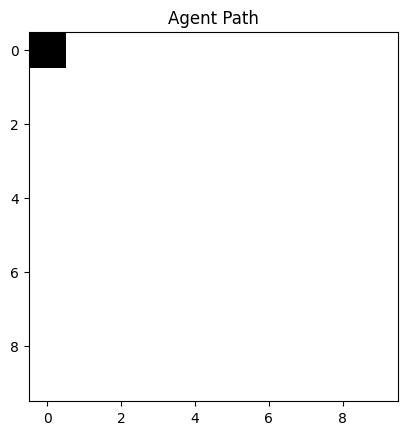

Action: down, Next State: (0, 1), Reward: 2, Total Reward: 4
Action: right, Next State: (1, 1), Reward: 2, Total Reward: 6
Action: right, Next State: (2, 1), Reward: 2, Total Reward: 8
Action: up, Next State: (2, 0), Reward: 2, Total Reward: 10
Action: right, Next State: (3, 0), Reward: 2, Total Reward: 12
Action: left, Next State: (2, 0), Reward: 2, Total Reward: 14
Action: up, Next State: (2, 0), Reward: 2, Total Reward: 16
Action: down, Next State: (2, 1), Reward: 2, Total Reward: 18
Action: up, Next State: (2, 0), Reward: 2, Total Reward: 20
Action: down, Next State: (2, 1), Reward: 2, Total Reward: 22
Action: up, Next State: (2, 0), Reward: 2, Total Reward: 24
Action: up, Next State: (2, 0), Reward: 2, Total Reward: 26
Action: down, Next State: (2, 1), Reward: 2, Total Reward: 28
Action: up, Next State: (2, 0), Reward: 2, Total Reward: 30
Action: right, Next State: (3, 0), Reward: 2, Total Reward: 32
Action: left, Next State: (2, 0), Reward: 2, Total Reward: 34


KeyboardInterrupt: 

In [45]:
class Agent:
    def __init__(self, world, start_state):
        self.world = world
        self.current_state = start_state
        self.total_reward = 0
        self.path = [start_state]

    def choose_action(self):
        return np.random.choice(ACTIONS)

    def take_action(self, action):
        next_state = self.world.get_next_state(self.current_state, action)
        reward = self.world.get_reward(*next_state)
        self.total_reward += reward
        self.current_state = next_state
        self.path.append(next_state)
        return next_state, reward

    def run(self, steps):
        plt.ion()
        fig, ax = plt.subplots()
        for _ in range(steps):
            action = self.choose_action()
            next_state, reward = self.take_action(action)
            print(f"Action: {action}, Next State: {next_state}, Reward: {reward}, Total Reward: {self.total_reward}")
            ax.clear()
            grid = np.copy(self.world.grid)
            for x, y in self.path:
                grid[x, y] = 'A'
            ax.imshow(grid == 'A', cmap='Greys', interpolation='nearest')
            ax.set_title('Agent Path')
            plt.pause(0.5)
        plt.ioff()

    def plot_path(self):
        grid = np.copy(self.world.grid)
        for x, y in self.path:
            grid[x, y] = 'A'
        plt.imshow(grid == 'A', cmap='Greys', interpolation='nearest')
        plt.title('Agent Path')
        plt.show()

# Initialize the agent at a starting position (0, 0)
agent = Agent(world, (0, 0))

# Initialize the agent at a starting position (0, 0)
agent = Agent(world, (0, 0))

# Run the agent for a specified number of steps
agent.run(50)

# Plot the path taken by the agent
agent.plot_path()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

ACTIONS = ["up", "down", "left", "right"]  # Discrete action space

# Neural Network for Q-learning
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)  # Q-values for all actions

# Deep Q-Learning Agent
class DQNAgent:
    def __init__(self, world, state_size, action_size, gamma=0.99, alpha=0.001, epsilon=0.1):
        self.world = world
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma  # Discount factor
        self.alpha = alpha  # Learning rate
        self.epsilon = epsilon  # Exploration rate
        
        self.memory = deque(maxlen=5000)  # Experience replay memory
        self.batch_size = 64

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = DQN(state_size, action_size).to(self.device)
        self.target_model = DQN(state_size, action_size).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())  # Sync target network
        self.optimizer = optim.Adam(self.model.parameters(), lr=alpha)
        self.loss_fn = nn.MSELoss()

    def choose_action(self, state):
        """Select an action using an epsilon-greedy policy."""
        if np.random.rand() < self.epsilon:
            return np.random.choice(ACTIONS)  # Explore
        else:
            state_tensor = torch.tensor(state, dtype=torch.float32).to(self.device)
            with torch.no_grad():
                q_values = self.model(state_tensor)
            return ACTIONS[torch.argmax(q_values).item()]  # Exploit

    def store_experience(self, state, action, reward, next_state, done):
        """Store experiences for replay."""
        action_index = ACTIONS.index(action)
        self.memory.append((state, action_index, reward, next_state, done))

    def train(self):
        """Train the model using experience replay."""
        if len(self.memory) < self.batch_size:
            return  # Not enough data to train

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states_tensor = torch.tensor(states, dtype=torch.float32).to(self.device)
        actions_tensor = torch.tensor(actions, dtype=torch.long).to(self.device)
        rewards_tensor = torch.tensor(rewards, dtype=torch.float32).to(self.device)
        next_states_tensor = torch.tensor(next_states, dtype=torch.float32).to(self.device)
        dones_tensor = torch.tensor(dones, dtype=torch.float32).to(self.device)

        # Compute Q values
        q_values = self.model(states_tensor)
        q_values = q_values.gather(1, actions_tensor.unsqueeze(1)).squeeze(1)

        # Compute target Q values
        with torch.no_grad():
            max_next_q_values = self.target_model(next_states_tensor).max(1)[0]
            target_q_values = rewards_tensor + (1 - dones_tensor) * self.gamma * max_next_q_values

        # Compute loss and update model
        loss = self.loss_fn(q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_network(self):
        """Update target network with current model weights."""
        self.target_model.load_state_dict(self.model.state_dict())

    def take_action(self):
        """Takes action in the world, updates state, and stores experience."""
        state = self.world.get_state_representation(self.current_state)
        action = self.choose_action(state)
        next_state, reward, done = self.world.step(action)

        self.store_experience(state, action, reward, next_state, done)
        self.current_state = next_state
        return action, next_state, reward

    def train_agent(self, episodes, update_target_every=10):
        """Train the agent in multiple episodes."""
        for episode in range(episodes):
            self.current_state = self.world.reset()
            done = False
            while not done:
                action, next_state, reward = self.take_action()
                self.train()
            if episode % update_target_every == 0:
                self.update_target_network()

    def run(self, steps):
        """Run the trained agent in real-time."""
        self.current_state = self.world.reset()
        for _ in range(steps):
            action, next_state, reward = self.take_action()
            print(f"Action: {action}, Next State: {next_state}, Reward: {reward}")


# Initialize the world and agent

world = World(10, 10)
world.add_reward(2, 3, "+")
world.add_reward(1, 2, "+")
world.add_reward(3, 2, "+")
world.add_reward(4, 3, "+")
world.add_reward(9, 3, "+")
world.add_reward(9, 9, "+")
world.add_reward(7, 8, "+")

agent = DQNAgent(world, state_size=4, action_size=len(ACTIONS))
agent.train_agent(episodes=1000)




RuntimeError: both arguments to linear need to be at least 1D, but they are 0D and 2D